In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [4]:
# Load the dataset
df = pd.read_csv(r"C:\Users\HP\Desktop\python notes\Project\uber_stock_data.csv")
df

,Date,Adj Close,Close,High,Low,Open,Volume
0,10-05-2019,41.570000,41.570000,45.000000,41.060001,42.000000,186322500
1,13-05-2019,37.099998,37.099998,39.240002,36.080002,38.790001,79442400
2,14-05-2019,39.959999,39.959999,39.959999,36.849998,38.310001,46661100
3,15-05-2019,41.290001,41.290001,41.880001,38.950001,39.369999,36086100
4,16-05-2019,43.000000,43.000000,44.060001,41.250000,41.480000,38115500
...,...,...,...,...,...,...,...
1439,30-01-2025,66.589996,66.589996,67.222000,63.419998,63.419998,33246500
1440,31-01-2025,66.849998,66.849998,67.870003,66.333000,67.089996,19805600
1441,03-02-2025,67.290001,67.290001,68.849998,65.178001,65.300003,25290000
1442,04-02-2025,69.750000,69.750000,70.190002,67.690002,67.690002,33786200


In [5]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [6]:
# Drop rows with invalid dates
df = df.dropna(subset=['Date'])

In [7]:
# Sort data by date
df = df.sort_values(by='Date')

In [8]:
# Ensure 'Close' column exists
if 'Close' not in df.columns:
    raise ValueError("Dataset does not contain 'Close' column")

In [9]:
# Handle missing values in 'Close'
df = df.dropna(subset=['Close'])

In [10]:
# Display basic information
print(df.info())
print(df.head())
print(df.tail())  # Display last 5 rows

<class 'pandas.core.frame.DataFrame'>
Index: 566 entries, 35 to 1426
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       566 non-null    datetime64[ns]
 1   Adj Close  566 non-null    float64       
 2   Close      566 non-null    float64       
 3   High       566 non-null    float64       
 4   Low        566 non-null    float64       
 5   Open       566 non-null    float64       
 6   Volume     566 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 35.4 KB
None
          Date  Adj Close      Close       High        Low       Open  \
35  2019-01-07  44.270000  44.270000  47.040001  44.060001  46.980000   
57  2019-01-08  41.310001  41.310001  42.535999  41.000000  42.139999   
99  2019-01-10  29.150000  29.150000  30.510000  28.650000  30.370001   
122 2019-01-11  31.370001  31.370001  31.700001  30.740999  31.450001   
36  2019-02-07  44.000000  44.000000

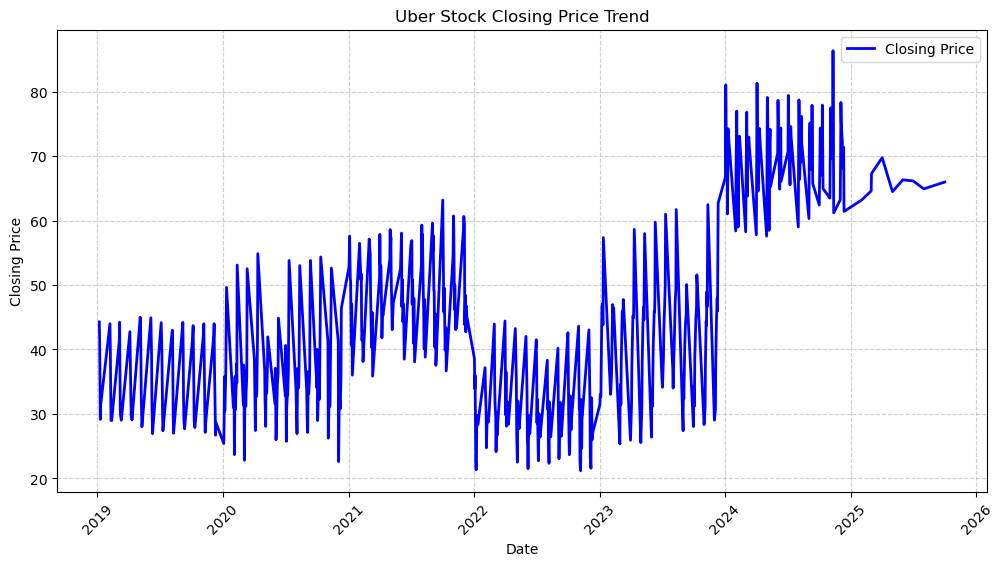

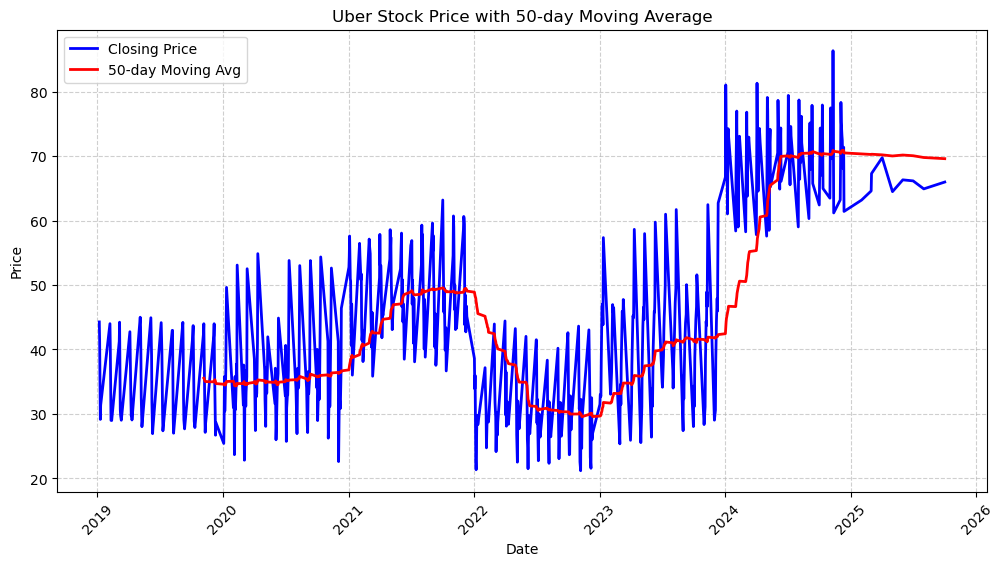

In [11]:
# Plot Closing Price Trend
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Uber Stock Closing Price Trend')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.show()

# Calculate and Plot Moving Average (50-day)
df['50_MA'] = df['Close'].rolling(window=50).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue', linewidth=2)
plt.plot(df['Date'], df['50_MA'], label='50-day Moving Avg', color='red', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Uber Stock Price with 50-day Moving Average')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.show()
